In [1]:
using Base.Test
using PyPlot

import Base: full, getindex, size, show, +, *

In [2]:
#Problem 1, Part i
function sparse_arrow(V)
    dim = convert(Int64, (size(V, 1) + 2)/3)
    # Down, Across, Diagonal
    I = vcat(repmat([1], dim), 2:dim, 2:dim)
    J = vcat(1:dim, repmat([1], dim-1), 2:dim)
    return sparse(I, J, V)
end

sparse_arrow (generic function with 1 method)

In [3]:
rand_arrow_diag = rand(1000);
rand_arrow_col = rand(999);

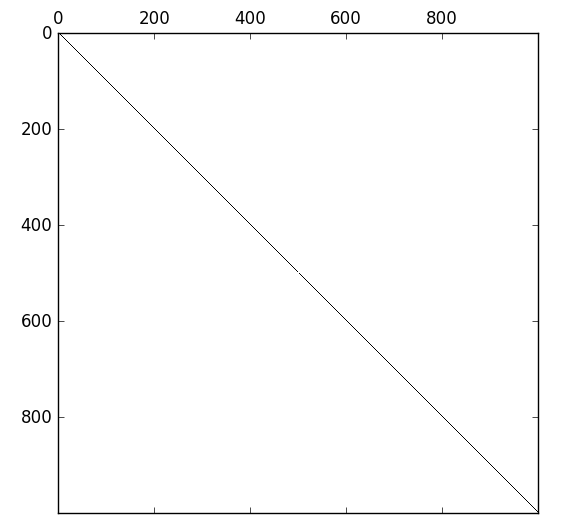

PyObject <matplotlib.image.AxesImage object at 0x32bdc00d0>

In [4]:
#Display the locations of non-zero values to verify sparse_arrow
for_sparse = vcat(rand_arrow_diag[1], rand_arrow_col, rand_arrow_col, rand_arrow_diag[2:end])
spy(full(sparse_arrow(for_sparse)))

In [5]:
#Problem 1, Part ii
type SymArrowFloat
    diag::Vector{Float64}
    col::Vector{Float64}

    SymArrowFloat(diag, col) = (size(diag, 1) - 1) != size(col, 1) ? error("wrong dimensions") : new(diag, col)
end

function full(mat::SymArrowFloat)
    dim = size(mat.diag, 1)
    full_mat = zeros(dim, dim)
    for i in 1:dim
        full_mat[i, i] = mat.diag[i]
        if i > 1
            full_mat[1, i] = mat.col[i - 1]
            full_mat[i, 1] = mat.col[i - 1]
        end
    end
    return full_mat
end

function +(first::SymArrowFloat, second::SymArrowFloat)
    return SymArrowFloat(first.diag .+ second.diag, first.col .+ second.col)
end

function *(first::SymArrowFloat, second::Vector{Float64})
    return full(first) * second
end

function show(io::IO, mat::SymArrowFloat)
    println(full(mat))
end

  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/videhs/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/videhs/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/videhs/.julia/v0.5/PyCall/sr

show (generic function with 251 methods)

In [20]:
#Unittests
@test SymArrowFloat([1, 2, 3], [2, 3]) * [0.0, 0.0, 0.0] == [0.0, 0.0, 0.0]
@test SymArrowFloat([0, 0, 0], [0, 0]) * [1.0, 2.0, 3.0] == [0.0, 0.0, 0.0]
@test SymArrowFloat([1, 2, 3], [4, 5]) * [6.0, 7.0, 8.0] == [74.0, 38.0, 54.0]

r1 = rand(10)
r2 = rand(9)
r3 = rand(10)
@test SymArrowFloat(r1, r2) * r3 == full(SymArrowFloat(r1, r2)) * r3

r1 = rand(100)
r2 = rand(99)
r3 = rand(100)
@test SymArrowFloat(r1, r2) * r3 == full(SymArrowFloat(r1, r2)) * r3

Test Passed
  Expression: SymArrowFloat(r1,r2) * r3 == full(SymArrowFloat(r1,r2)) * r3
   Evaluated: [27.42,0.68334,0.494031,0.158947,0.462914,0.219224,0.671526,0.593933,0.572625,0.647343  …  0.510301,0.202623,0.320319,0.474894,0.613305,0.71826,0.821546,0.440061,0.582681,0.91717] == [27.42,0.68334,0.494031,0.158947,0.462914,0.219224,0.671526,0.593933,0.572625,0.647343  …  0.510301,0.202623,0.320319,0.474894,0.613305,0.71826,0.821546,0.440061,0.582681,0.91717]

In [11]:
#Problem 1, Part iii
type SymArrow{T}
    diag::Vector{T}
    col::Vector{T}
end

function full{T}(mat::SymArrow{T})
    dim = size(mat.diag, 1)
    full_mat = zeros(dim, dim)
    for i in 1:dim
        full_mat[i, i] = mat.diag[i]
        if i > 1
            full_mat[1, i] = mat.col[i - 1]
            full_mat[i, 1] = mat.col[i - 1]
        end
    end
    return full_mat
end

function +{T}(first::SymArrow{T}, second::SymArrow{T})
    return SymArrow{T}(first.diag .+ second.diag, first.col .+ second.col)
end

function *{T}(first::SymArrow{T}, second::Vector{T})
    return full(first) * second
end

function show{T}(io::IO, mat::SymArrow{T})
    println(full(mat))
end

show (generic function with 252 methods)

In [21]:
arrow_rational = SymArrow(convert(Array{Rational, 1}, rand_arrow_diag), convert(Array{Rational, 1}, rand_arrow_col));
arrow_complex = SymArrow(convert(Array{Complex, 1}, rand_arrow_diag), convert(Array{Complex, 1}, rand_arrow_col));
arrow_bigfloat = SymArrow(convert(Array{BigFloat, 1}, rand_arrow_diag), convert(Array{BigFloat, 1}, rand_arrow_col));

In [13]:
#Problem 1, Part iv
type SymArrow2{T} <: AbstractMatrix{T}
    diag::Vector{T}
    col::Vector{T}
end

size{T}(A::SymArrow2{T}) = (length(A.diag), length(A.diag))

function getindex{T}(A::SymArrow2{T}, i, j)
    if i == j
        return A.diag[i]
    elseif i == 1
        return A.col[j - 1]
    elseif j == 1
        return A.col[i - 1]
    else
        return zero(T)
    end
end

getindex (generic function with 208 methods)

In [26]:
@test full(SymArrow2([1, 2, 3], [9, 10])) == reshape([1, 9, 10, 9, 2, 0, 10, 0, 3], (3, 3))

Test Passed
  Expression: full(SymArrow2([1,2,3],[9,10])) == reshape([1,9,10,9,2,0,10,0,3],(3,3))
   Evaluated: [1 9 10; 9 2 0; 10 0 3] == [1 9 10; 9 2 0; 10 0 3]

In [27]:
@test SymArrow2([1, 2, 3], [9, 10]) * [3, 4, 5] == [89, 35, 45]

Test Passed
  Expression: SymArrow2([1,2,3],[9,10]) * [3,4,5] == [89,35,45]
   Evaluated: [89,35,45] == [89,35,45]

In [16]:
#Power Method for Eigens (from Lecture Notes)

function power_method(M, v)
    T = eltype(v)
    for i in 1:100
        v = M*v        # repeatedly creates a new vector and destroys the old v
        v /= T(norm(v))
    end
    
    return v, T(norm(M*v)) / T(norm(v))  # or  (M*v) ./ v
end

power_method (generic function with 1 method)

In [28]:
arrow = SymArrowFloat(rand_arrow_diag, rand_arrow_col);
tic()
p = power_method(arrow, rand_arrow_diag)
toc()
println("SSE:")
println(sum((full(arrow) * p[1] - p[2] * p[1]) .^ 2))

elapsed time: 0.20459116 seconds
SSE:
6.774884367643827e-5


In [29]:
arrow = SymArrow(rand_arrow_diag, rand_arrow_col);
tic()
p = power_method(arrow, rand_arrow_diag)
toc()
println("SSE:")

println(sum((full(arrow) * p[1] - p[2] * p[1]) .^ 2))

elapsed time: 0.205485789 seconds
SSE:
6.774884367643827e-5


In [30]:
arrow = SymArrow2(rand_arrow_diag, rand_arrow_col);
tic()
p = power_method(arrow, rand_arrow_diag)
toc()
println("SSE:")

println(sum((full(arrow) * p[1] - p[2] * p[1]) .^ 2))

elapsed time: 1.926893022 seconds
SSE:
6.774884367690574e-5


Looking at the results, it is clear that generic programming, saves programming time at the cost of exeuction time. This is entirely to be expected. For example, if we were to add two SymArrow2 types, Julia would have to look at all $n^2$ cells using the getindex() method. However, when we define matrix addition ourselves, we can take advantage of the fact that we only need to add two vectors to get the updated matrix. Of course, this comes at the cost of taking time to write more code.

Given that Julia already makes prototyping fast, and code quick to execture, which one is better is heavily dependant on application. For most things, I think that Julia code is quick enough to write, that taking the time to specify things is probably worth it, given the huge execution payoff.

SymArrow and SymArrowFloat trade of in speed when I run them again and again. Benchmarks were inconclusive. This is not very suprising, given Julia's compilation.

#### Problem 2
The given procedure is equivalent to the following, done on a BST. First, moving in a bottom up fashion:

* for all nodes $i$:
    * sum($i$) = sum(left_child($i$)) + sum(right_child($i$))

Then, in a top-down fashion:

* prefix_sum(root) = 0
* for all nodes $i$:
    * prefix_sum(left_child($i$)) = prefix_sum($i$)
    * prefix_sum(right_child($i$)) = sum(left_child($i$)) + prefix_sum($i$)
    
Now, we can use induction to prove correctness. To show that the above procedure works, it suffices to show that after the top-down routine, prefix_sum($i$) contains the sum of the values of $1\dots i$.

* Inductive Hypothesis
    * If a parent $i$ has the correct sum, then left_child($i$) and right_child($i$) must both also have the correct sums

* Base Case
    * The root node is initialized to prefix_sum(root) = 0, which is correct
    
* Inductive Case
    * left_child($i$) has the same leaves before it as $i$. So, for left_child($i$), prefix_sum($i$) is correct from the inductive hypothesis
    * right_child($i$) has two sets of leaves before it.
        * leaves before the parent node, $i$
        * leaves before the left_child($i$)
    * since prefix_sum($i$) is correct from the inductive hypothesis, prefix_sum(right_child($i$)) = sum(left_child($i$)) + prefix_sum($i$)

I don't think this is fully rigorous, but it definately makes sense (at least for me) framed on a tree, as opposed to the pure recursion.